In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
hab=pd.read_csv("haberman.csv")


In [34]:
print(hab.shape)


(306, 4)


In [37]:
#We have a plenty of dataset regading the cancer patients. where 306 row and 4 column, 
# 306 rows show the number of patients and 4 represent the different information about them

In [5]:
print(hab.head)
#Here we can see some starting and ending data regarding the patients.

<bound method NDFrame.head of      age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]>


In [8]:
print(hab.columns)


Index(['age', 'year', 'nodes', 'status'], dtype='object')


**Age**= It represent the age of patient at which they undergone surgery.

**Year**= Year in which patient was undergone surgery

**Nodes**=Basically it is lymph nodes, which detect cancer cells before they reach to the other part of the body, it will be many in numbers.

**status**= It represent whether patient survive more than 5 years or less after undergone through surgery.
        Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.

In [5]:
hab.describe()


,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# 2-D scatter plot



Text(0.5, 1.0, '2-D scatter plot')

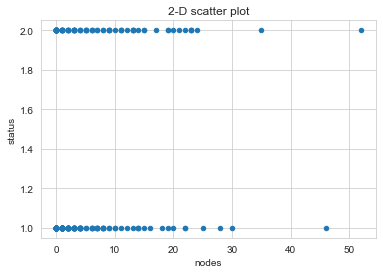

In [3]:
sns.set_style("whitegrid");
hab.plot(kind="scatter",x="nodes",y="status")
plt.title("2-D scatter plot")


**Observations:**

Both the data points are mixed so we can't draw our conclusion from 2-D scatter plot.

# 2-D scatter plot using seaborn


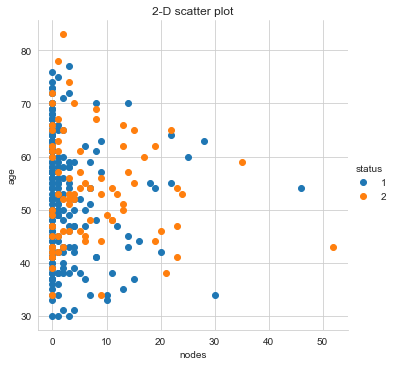

In [5]:
sns.set_style("whitegrid")
sns.FacetGrid(hab,hue="status",height=5)\
    .map(plt.scatter,"nodes","age")\
    .add_legend()
plt.title("2-D scatter plot")
plt.show()

**Observations:**

**1.** Here we can easily detect the blue and the orange points, where blue is defined as the cancer patients survived 5 years or more,where as orange is defined as the cancer patient survived less then 5 years.

**2.** To make any conclusion would be lead to error because of the unseperated points.

**3.** There are very less posibility of cancer below 30 years and after 79 years 


# Pair-plot


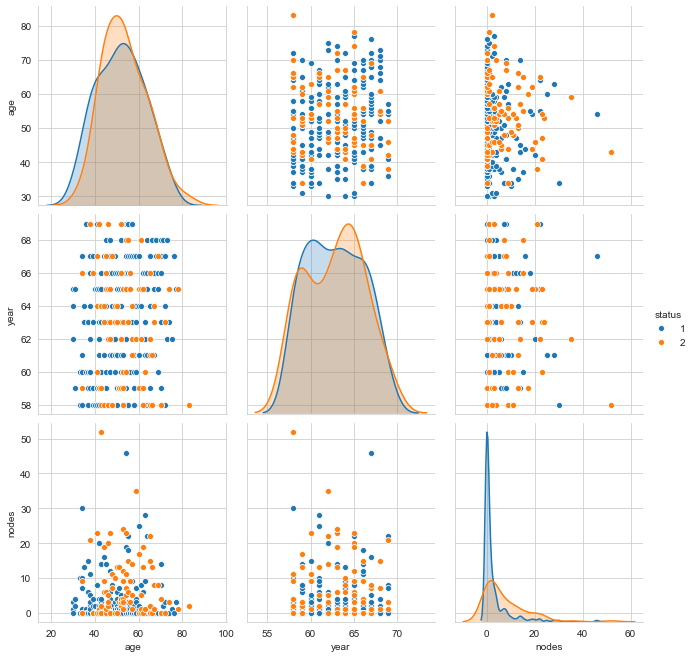

In [10]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(hab, hue="status", height=3);
plt.show()

**Observations:**

1.All all the graph are overlapped to each other we can not make our assumtiom from it but there is some posibility with the 9th graph (nodes),although it is also not perfect to make assumptions but it is still better then others.

2.we can conclude that the cancer patients who live more than 5 year 



# Histogram


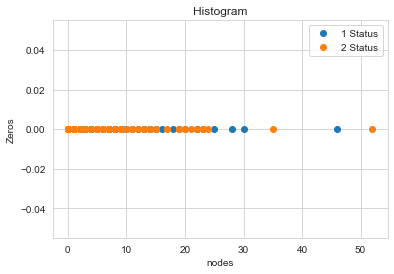

In [39]:
import numpy as np
hab_Long_Survive = hab.loc[hab["status"] == 1];
hab_Short_Survive = hab.loc[hab["status"] == 2];
plt.plot(hab_Long_Survive["nodes"], np.zeros_like(hab_Long_Survive['nodes']), "o",label="1 Status")
plt.plot(hab_Short_Survive["nodes"], np.zeros_like(hab_Short_Survive['nodes']),"o",label="2 Status")
plt.xlabel("nodes")
plt.ylabel("Zeros")
plt.title("Histogram")
plt.legend()
plt.show()

# PDF (Probability distribution function)
**probability Density Function (PDF) is the probability that the variable takes a value x. (a smoothed version of the histogram)**

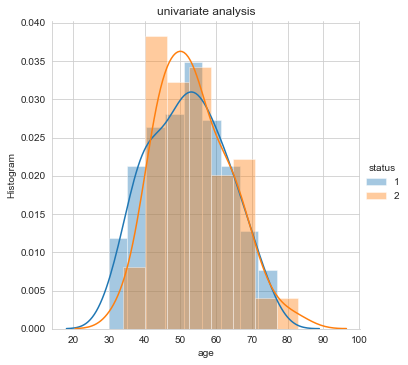

In [18]:
sns.FacetGrid(hab, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("univariate analysis")
plt.ylabel("Histogram")
plt.show();

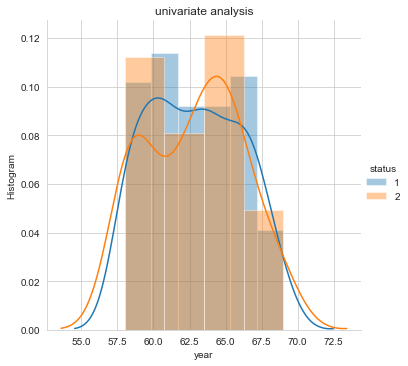

In [20]:
sns.FacetGrid(hab, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.title("univariate analysis")
plt.ylabel("Histogram")
plt.show();

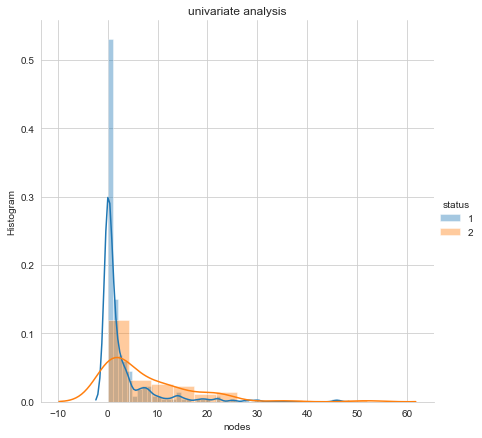

In [19]:
sns.FacetGrid(hab, hue="status", height=6) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.title("univariate analysis")
plt.ylabel("Histogram")
plt.show();

# Observations:

we can observe that cancer patients who live five or more than five year have one thing common which is that, If they have less nodes then posibilities of living is high.As the data is complex so we can not sure about the observations. 

As compare to other type of graphs,PDF is much suitable for our observation.PDF of "year" and PDF of "age" both are verry much overlapped to each other but PDF of "node" is slightly different.

**1.**f(nodes≤0)

    Patient= Long survival
    
**2.**else if(nodes≥0 && nodes≤5(approx))

    Patient= Long survival chances are high
    
**3.**else if(nodes ≥5)

    Patient = Short survival

# (Cumulative Distribution Function)
**CDF will give the cumulative plot of PDF so that you can calculate what are the exact percentage of patient survival status**

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


Text(0, 0.5, 'probability')

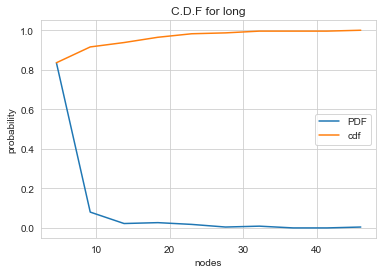

In [30]:
counts, bin_edges = np.histogram(hab_Long_Survive["nodes"], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF");
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.legend()
plt.title("C.D.F for long")
plt.xlabel("nodes")
plt.ylabel("probability")

# Observations:
**1.** The horizontal axis shows the no of nodes and the verticle axis shows the probability.

**2.** As we can see there is CDF graph for the long survive patients which is denoted by Orange line,
        and Blue line is denoted to the PDF.

**3.** The patients which have =<11 approx nodes have 90% approx long survive rate or vice versa.

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


Text(0, 0.5, 'probability')

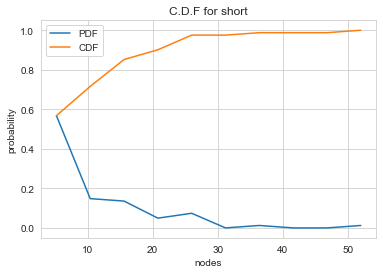

In [31]:

counts, bin_edges = np.histogram(hab_Short_Survive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="PDF")
plt.plot(bin_edges[1:], cdf,label="CDF")
plt.legend()
plt.title("C.D.F for short")
plt.xlabel("nodes")
plt.ylabel("probability")


# Observation:
**1.**  In Short survival nearly 58% approx of people who have nodes less than 5 and there are nearly 90% of people in short survival if nodes are <28 approx.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


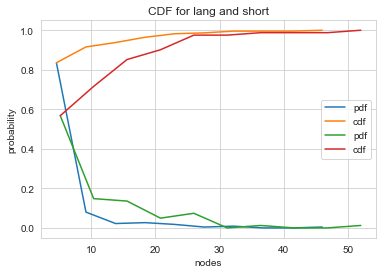

In [32]:
counts, bin_edges = np.histogram(hab_Long_Survive["nodes"], bins=10, 
 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf");
plt.plot(bin_edges[1:], cdf,label="cdf")

counts, bin_edges = np.histogram(hab_Short_Survive['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label="pdf")
plt.plot(bin_edges[1:], cdf,label="cdf")
plt.legend()
plt.title("CDF for lang and short")
plt.xlabel("nodes")
plt.ylabel("probability")
plt.show();

# Observation:
**1.** By observing the two graph together we can say that only approx( 20% + 10%) time we will get the correct answer for the long survive patients and approx 80% time we will face error in the case of long survive patients.

**2.** For sort surviving it is very hard to predict the results because of the overlapping of two graphs.


# Mean, Variance and Std-dev

In [21]:
print("Means:")
print(np.mean(hab_Long_Survive["nodes"]))
#Mean with an outlier.
print(np.mean(np.append(hab_Long_Survive["nodes"],50)));
print(np.mean(hab_Short_Survive["nodes"]))


print("\nStd-dev:");
print(np.std(hab_Long_Survive["nodes"]))
print(np.std(hab_Short_Survive["nodes"]))




Means:
2.7911111111111113
3.0
7.45679012345679

Std-dev:
5.857258449412131
9.128776076761632


# Observations:
**1.** In the mean section we can say that (2.79) is node mean of surviving patients,But std-dev is greater than the mean, which means the spread of nodes for the patients is (2.8+12= 15 approx) if a patients have approx 8 nodes the patients will blong survival.

**2** The mean of the nodes for short survive is higher, which is 7.45=8, But std-dev is greater than the mean, which means the spread of nodes for the patients is (7.5+ 19 = 27 approx). 16 nodes or more then 16 nodes lead to the short survive of the patients.

# Median, Percentile, Quantile, IQR, MAD

In [25]:
print("\nMedians:")
print(np.median(hab_Long_Survive["nodes"]))
#Median with an outlier
print(np.median(np.append(hab_Long_Survive["nodes"],50)));
print(np.median(hab_Short_Survive["nodes"]))

print("\nQuantiles:")
print(np.percentile(hab_Long_Survive["nodes"],np.arange(0, 100, 25)))
print(np.percentile(hab_Short_Survive["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(hab_Long_Survive["nodes"],90))
print(np.percentile(hab_Short_Survive["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(hab_Long_Survive["nodes"]))
print(robust.mad(hab_Short_Survive["nodes"]))



Medians:
0.0
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


# Observations
**1.**From above observation it is clear that average nodes in long survival is 0 and for short survival it is 4. ie, Patients who have average 4 nodes have short survival status.

**2.**Quantiles shows that nearly 50th% of nodes are 0 in long survival and 75th% of patients have nodes less than 3 that is 25% patients are having nodes more than 3.

**3.**Similarly, In short survival 75th% of patients have minimum 11 nodes detected.
At 90th% there if nodes detected is >8 then it has long survival status and if nodes are >20 then patients will have short survival status

# Box Plot and Whiskers

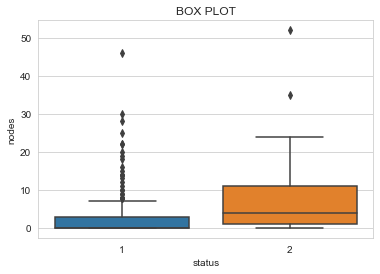

In [34]:
sns.boxplot(x='status',y='nodes', data=hab)
plt.title("BOX PLOT")
plt.show()

# Observations:
**1.** The 25% nodes of the long survival is 0 and The 50% nodes of the long survival is 1 and the 75% of long survival is 2, which is preety good result.

**2.** The 25% nodes of the short survival is 1 and The 50% nodes of the short survival is 5 and the 75% of short survival is 10.


# Violin plots

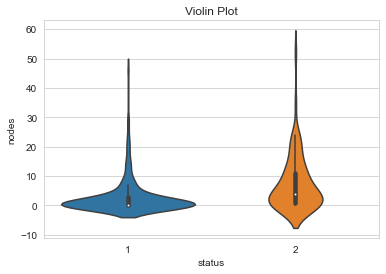

In [37]:
sns.violinplot(x="status", y="nodes", data=hab, size=8)
plt.title("Violin Plot")
plt.show()

# Observation:
In above violin plot we observe that For long survive density for it is more near the 0 nodes and also it has whiskers in range o-6 and in violin 2 it shows the short survival density more from 0–20 ans threshold from 0–11

# Summarizing plots
**1.** We did not get the perfect answer because of the data overlapping but we are close to the answer.

**2.** Yes we can diagnose the Haberman's cancer data set by different data analysis techniques.